# 로지스틱 회귀

- 럭키백의 확률
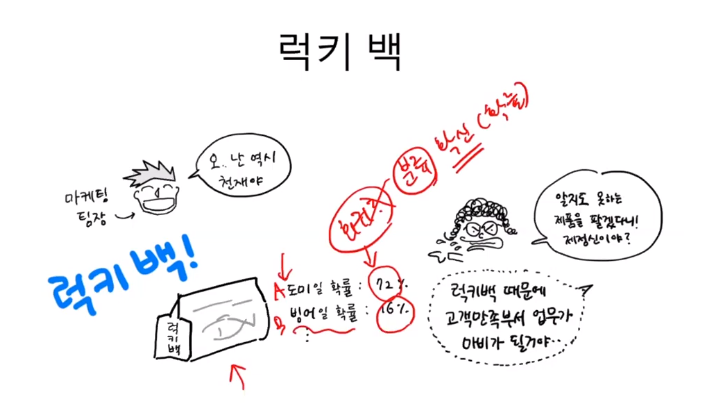

## 데이터 준비하기

In [1]:
import pandas as pd
import numpy as np

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
fish.columns

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [3]:
fish_input=fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target=fish['Species'].to_numpy()

In [4]:
from sklearn.model_selection import train_test_split

train_input,test_input,train_target,test_target=train_test_split(fish_input,fish_target,random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

## k-최근접 이웃 분류기의 확률 예측

In [6]:
from sklearn.neighbors import KNeighborsClassifier

kn=KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,train_target)

print(kn.classes_) #sklearn에서 _가 있으면 모델 클래스만들때 지정한값이 아니라 학습으로 나온값
print(kn.predict(test_scaled[:5]))

proba=kn.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=4)) #총 5개 샘플(5개 행), 7마리 생선에서 3번째라고 예측할 확률 1
#n_neighbors 가 3이므로 0,1/3,2/3,1 밖에 없음

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


## 로지스틱 회귀
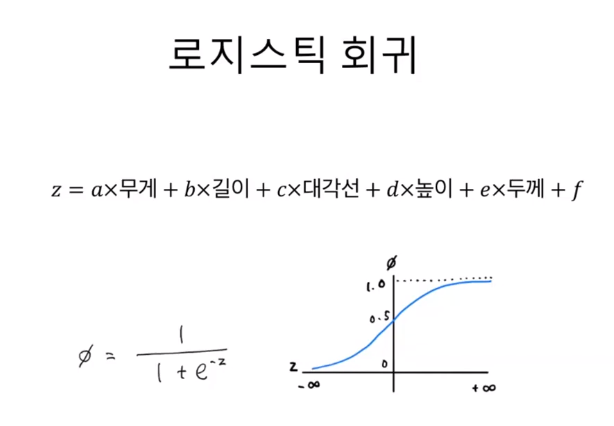

## 로지스틱 회귀로 이진 분류 수행하기

In [7]:
bream_smelt_indexes= (train_target == 'Bream') | (train_target=='Smelt')
train_bream_smelt=train_scaled[bream_smelt_indexes] # True인 값만 가져옴
target_bream_smelt=train_target[bream_smelt_indexes] # True인 값만 가져옴


In [8]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(train_bream_smelt,target_bream_smelt)
print(lr.predict(train_bream_smelt[:5]))
print(lr.predict_proba(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


## 로지스틱 회귀 계수 확인

In [9]:
print(lr.coef_,lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


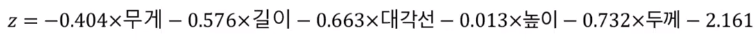

In [10]:
# decision_function  z값을 추정

decisions=lr.decision_function(train_bream_smelt[:5])
decisions

array([-6.02927744,  3.57123907, -5.26568906, -4.24321775, -6.0607117 ])

In [11]:
from scipy.special import expit #시그모이드
print(expit(decisions)) #8번에 2번째 열과 값이 같다.

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


## 로지스틱 회귀로 다중 분류 수행하기

In [12]:
lr=LogisticRegression(C=20,max_iter=1000) # C=20 으로 규제 완화
#C: L2규제 기본 적용, C 높아지면 규제가 약해, C가 낮아지면 규제가 강해진다.
# max_iter=반복횟수 
lr.fit(train_scaled,train_target)

print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.9327731092436975
0.925


In [13]:
proba=lr.predict_proba(test_scaled[:5])
print(np.round(proba,decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [14]:
print(lr.coef_.shape,lr.intercept_.shape) #5는 특성에 곱해지는 계수

(7, 5) (7,)


## 소프트맥스

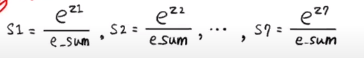

In [15]:
decsion=lr.decision_function(test_scaled[:5]) #z0,z1,z2 z3 
print(np.round(decsion,decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [16]:
from scipy.special import softmax #소프트맥스

proba=softmax(decsion,axis=1)
print(np.round(proba,decimals=3))  #13번과 같은 결과

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
#시그모이드, #소프트맥스
#시그모이드: 이진분류일 경우에 확률을 표현
#소프트맥스: 다진분류일 경우에 확률을 표현